### **Chapter 17:** $\underline{\textbf{    INTERPOLATION}}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline

**Q3.**  Write a function $\texttt{my\_nearest\_neighbor}(x, y, X),$ where $x$ and $y$ are arrays that contain experimental data points, and $X$ is an array. Assume that $x$ and $X$ are in ascending order and have unique elements. The output argument, $Y$, should be an array the same size as $X$, where $Y[i]$ is the nearest neighbor interpolation of $X[i].$ That is, $Y[i]$ should be the $y[j]$ where $x[j]$ is the closest independent data point of $X[i]$. Do not use interp1d from SciPy.

In [2]:
def my_nearest_neighbor(x, y, X):
    Y = np.zeros_like(X)
    for i in range(len(X)):
        distances = np.abs(x - X[i])
        nearest_index = np.argmin(distances)
        Y[i] = y[nearest_index]
    return Y

x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([0, 1, 4, 9, 16, 25])
X = np.array([1.2, 2.8, 3.5, 4.1])

Y = my_nearest_neighbor(x, y, X)
print(f"{Y}\n")

x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([0, 1, 4, 9, 16, 25, 36, 49, 64, 81])  # y = x^2
X = np.array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5])

Y = my_nearest_neighbor(x, y, X)
print(Y)

[ 1.  9.  9. 16.]

[ 0.  1.  4.  9. 16. 25. 36. 49. 64. 81.]


**Q7.**  Write a function $\texttt{my\_interp\_plotter}(x, y, X, option),$ where $x$ and $y$ are arrays containing experimental data points, and $X$ is an array that contains the coordinates for which an interpolation is desired. The input argument option should be a string, either $“linear,” “spline,” or “nearest.”$ Your function should produce a plot of the data points $(x,y)$ marked as red circles. The points $(X,Y),$ where $X$ is the input and $Y$ is the interpolation at the points contained in $X$ defined by the input argument specified by option. The points $(X,Y)$ should be connected by a blue line. Be sure to include the title, axis labels, and a legend. Hint: You should use interp1d from SciPy.

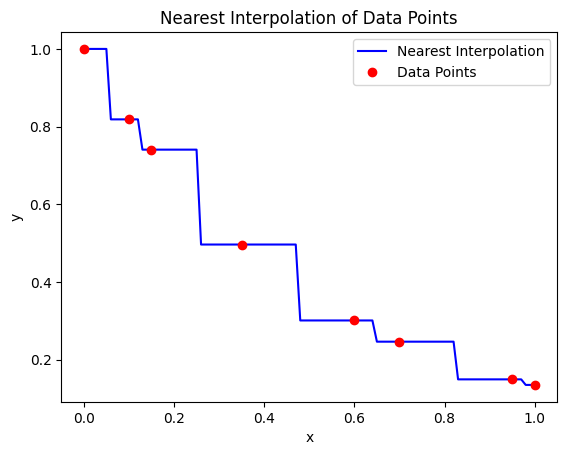

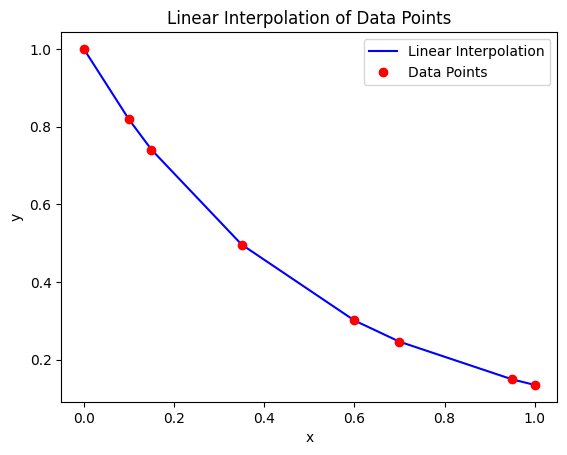

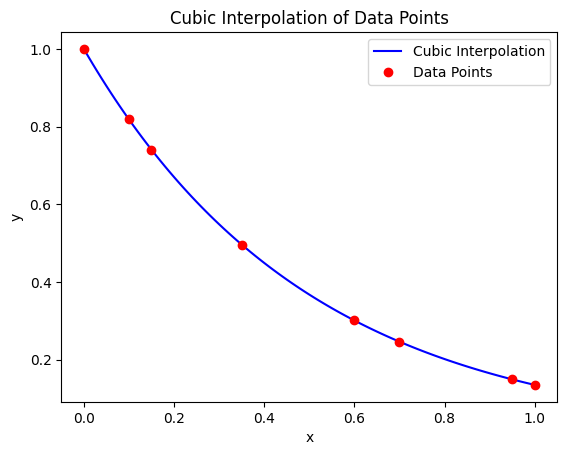

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

def my_interp_plotter(x, y, X, option):
    P = interp1d(x, y, kind=option, fill_value="extrapolate")
    Y = P(X)
    plt.plot(X, Y, 'b-', label=f"{option.capitalize()} Interpolation")
    plt.plot(x, y, 'ro', label="Data Points")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"{option.capitalize()} Interpolation of Data Points")
    plt.legend()
    plt.show()

x = np.array([0, .1, .15, .35, .6, .7, .95, 1])
y = np.array([1,0.8187,0.7408,0.4966,0.3012,0.2466,0.1496,0.1353])
X = np.linspace(0, 1, 101)

my_interp_plotter(x, y, X, "nearest")
my_interp_plotter(x, y, X, "linear")
my_interp_plotter(x, y, X, "cubic")

**Q8.** Write a function $\texttt{my\_D\_cubic\_spline}(x, y, X, D),$ where the output $Y$ is the cubic spline interpolation at $X$ taken from the data points contained in $x$ and $y.$ Instead of the standard pinned endpoint conditions $(i.e.,$ $S'_1(x_1) = 0$ and $S''_{n−1}(x_n) = 0),$ use the endpoint conditions $S'_1(x_1) = D$ and $S''_{n−1}(x_n) = D$ $(i.e.,$ the slopes of the interpolating polynomials at the endpoints are $D).$ 

Y = 0.5401785714285714


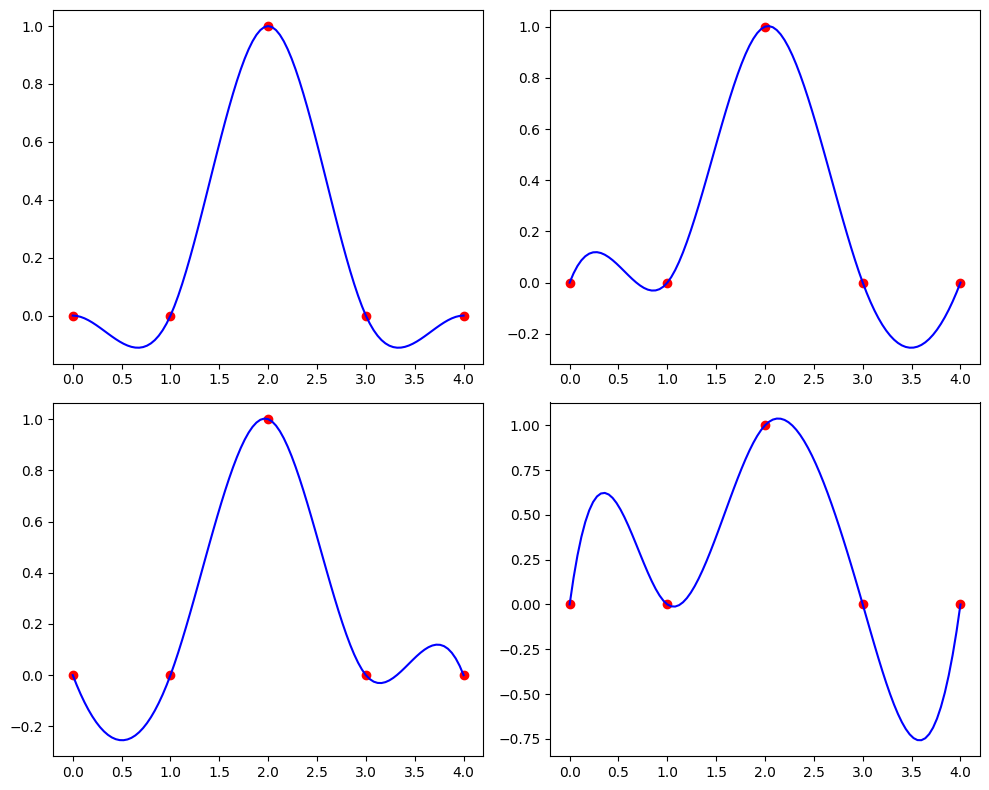

In [4]:
def my_D_cubic_spline(x, y, X, D):
    f = CubicSpline(x, y, bc_type=((1, D), (1, D)))
    return f(X)

x = [0, 1, 2, 3, 4]
y = [0, 0, 1, 0, 0]
X = np.linspace(0, 4, 101)

Y = my_D_cubic_spline(x, y, 1.5, 1)
print(f"Y = {Y}")
plt.figure(figsize = (10, 8))
plt.subplot(221)
plt.plot(x, y, "ro", X, my_D_cubic_spline(x, y, X, 0), "b")
plt.subplot(222)
plt.plot(x, y, "ro", X, my_D_cubic_spline(x, y, X, 1), "b")
plt.subplot(223)
plt.plot(x, y, "ro", X, my_D_cubic_spline(x, y, X,-1), "b")
plt.subplot(224)
plt.plot(x, y, "ro", X, my_D_cubic_spline(x, y, X, 4), "b")
plt.tight_layout()
plt.show()

*This is the **END** of this Exercise.*